In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 가져오기

## 포지션별 데이터

In [8]:
data_path = './EPL_data/EPL_Position_Player_Value/'
path_list = os.listdir(data_path)
path_list.pop(1)
path_list

['EPL_GK_Player.csv',
 'EPL_M_Player.csv',
 'EPL_AM_Player.csv',
 'EPL_DM_Player.csv',
 'EPL_FW_Player.csv',
 'EPL_D_Player.csv']

In [11]:
EPL_GK_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[0])
EPL_M_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[1])
EPL_AM_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[2])
EPL_DM_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[3])
EPL_FW_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[4])
EPL_D_player_df = pd.read_csv('./EPL_data/EPL_Position_Player_Value/'+path_list[5])

In [13]:
print(EPL_GK_player_df.shape)
print(EPL_M_player_df.shape)
print(EPL_AM_player_df.shape)
print(EPL_DM_player_df.shape)
print(EPL_FW_player_df.shape)
print(EPL_D_player_df.shape)

(19, 35)
(56, 35)
(71, 35)
(18, 35)
(16, 35)
(128, 35)


In [15]:
# col확인 -> Unnamed: 0 제거 필요
EPL_AM_player_df.columns

Index(['Unnamed: 0', 'player_name', 'team_number', 'Team', 'age', 'position',
       'Apps', 'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB',
       'ThrB', 'Rating', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG'],
      dtype='object')

In [16]:
#  Unnamed: 0 제거
EPL_GK_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_GK_player_df.shape

(19, 34)

In [17]:
#  Unnamed: 0 제거
EPL_M_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_M_player_df.shape

(56, 34)

In [18]:
#  Unnamed: 0 제거
EPL_AM_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_AM_player_df.shape

(71, 34)

In [19]:
#  Unnamed: 0 제거
EPL_DM_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_DM_player_df.shape

(18, 34)

In [20]:
#  Unnamed: 0 제거
EPL_FW_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_FW_player_df.shape

(16, 34)

In [21]:
#  Unnamed: 0 제거
EPL_D_player_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_D_player_df.shape

(128, 34)

## EPL 팀 분석 데이터

In [14]:
EPL_Team_df = pd.read_csv('./EPL_data/EPL_Team.csv')
EPL_Team_df.shape

(20, 25)

In [29]:
EPL_Team_df.drop('Unnamed: 0', axis=1, inplace=True)
EPL_Team_df.shape

(20, 24)

# GK 포지션 데이터
## GK포지션에서 승리에 가장 큰 영향을 주는 변수 추출
- 포지션의 특수성을 생각해서 필요없는 변수는 미리 제거

In [26]:
EPL_GK_df = pd.merge(EPL_GK_player_df, EPL_Team_df, on='Team', how='inner')

In [32]:
# GK 데이터 cols 확인
# 필요없는 변수는 제거해준다.

EPL_GK_df.columns

Index(['player_name', 'team_number', 'Team', 'age', 'position', 'Apps', 'Mins',
       'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB',
       'Rating_x', 'Goals_x', 'Yel', 'Red_x', 'SpG', 'AerialsWon_x', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'Unnamed: 0',
       'Rank_x', 'P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Rank_y',
       'Goals_y', 'Shotspg', 'Yellow', 'Red_y', 'Possession', 'Pass',
       'AerialsWon_y', 'Rating_y', 'Squad', 'Average age', 'Foreigne Players',
       'Average Market Value', 'Market Value'],
      dtype='object')

In [35]:
# 필요없는 변수 추측
# 필요한 변수만 뽑아온다.

EPL_GK_df = EPL_GK_df[['age','Apps', 'Mins', 'Assists', 
                       'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 
                       'ThrB','Rating_x', 'Yel', 'Red_x', 'AerialsWon_x', 
                       'MoM', 'Dribble', 'Fouled', 'Disp', 'UnsTch', 
                       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 
                       'Drb', 'Blocks', 'OwnG', 'Rank_x', 'P', 
                       'GF', 'GA', 'GD', 'Pts', 'Possession', 
                       'Pass', 'Squad', 'Market Value']]

In [36]:
EPL_GK_df

,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,...,Rank_x,P,GF,GA,GD,Pts,Possession,Pass,Squad,Market Value
0,27,38,3420,0,0.1,38.8,60.7,0.0,10.8,0.0,...,9,38,58,46,12,59,43.3,74.8,36,€371.20m
1,31,36,3240,0,0.0,33.5,76.3,0.0,4.4,0.0,...,10,38,55,53,2,52,48.6,80.0,47,€295.25m
2,30,37,3330,1,0.0,33.5,83.4,0.0,4.5,0.0,...,5,38,75,47,28,67,60.6,84.2,39,€811.85m
3,30,36,3141,0,0.1,34.7,71.6,0.0,6.6,0.0,...,7,38,51,46,5,61,49.2,81.1,43,€509.55m
4,28,29,2566,0,0.0,30.9,80.7,0.0,4.1,0.0,...,12,38,38,47,-9,44,58.8,85.8,43,€994.95m
5,33,27,2386,0,0.0,25.8,56.0,0.0,6.4,0.0,...,15,38,37,71,-34,39,40.0,77.5,47,€287.20m
6,36,27,2430,0,0.0,26.0,67.5,0.0,5.6,0.0,...,11,38,40,49,-9,45,45.8,79.3,39,€323.05m
7,31,37,3262,0,0.1,17.8,58.8,0.0,3.8,0.0,...,4,38,68,33,35,71,52.2,79.8,38,€541.60m
8,29,37,3330,1,0.1,31.2,51.8,0.0,7.9,0.0,...,17,38,34,57,-23,36,42.5,77.0,40,€413.15m
9,38,36,3114,0,0.0,21.5,58.1,0.0,5.8,0.0,...,14,38,42,55,-13,40,41.4,78.2,44,€465.75m


In [42]:
# 승점을 기준으로 내림차순 정렬

EPL_GK_df.sort_values('Pts', ascending=False, inplace=True)
EPL_GK_df[['Pts']]

,Pts
15,89
11,84
10,75
7,71
2,67
18,62
3,61
12,60
0,59
1,52


In [44]:
# 수치형 데이터만 뽑아온다.

EPL_GK_numeric_df = EPL_GK_df.select_dtypes(['int64', 'float64'])

In [45]:
# 상관관계 확인

EPL_GK_corr_matrix = EPL_GK_numeric_df.corr()
EPL_GK_corr_matrix

,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,ThrB,...,OwnG,Rank_x,P,GF,GA,GD,Pts,Possession,Pass,Squad
age,1.000000,-1.173706e-01,-0.159524,-0.035702,-0.052689,-0.351490,0.111469,NaN,-0.025519,NaN,...,1.338808e-01,-0.149403,NaN,-0.110901,-0.187330,0.011682,0.068226,-0.241671,0.017924,-0.200734
Apps,-0.117371,1.000000e+00,0.996476,0.291449,0.417088,0.137891,-0.187998,NaN,0.237165,NaN,...,6.956838e-17,-0.270625,NaN,0.126134,-0.432634,0.282549,0.317753,0.027106,-0.159826,0.129011
Mins,-0.159524,9.964755e-01,1.000000,0.313234,0.394701,0.169748,-0.176879,NaN,0.233956,NaN,...,-2.458142e-02,-0.269230,NaN,0.139600,-0.422822,0.287056,0.321146,0.048223,-0.152730,0.124348
Assists,-0.035702,2.914494e-01,0.313234,1.000000,0.130437,0.293524,0.267826,NaN,0.137040,NaN,...,-1.875000e-01,-0.190816,NaN,0.302932,-0.273595,0.327886,0.256484,0.335819,0.284632,-0.395480
KeyP,-0.052689,4.170885e-01,0.394701,0.130437,1.000000,0.190644,-0.347025,NaN,0.562193,NaN,...,4.844814e-01,-0.085924,NaN,-0.065948,-0.333247,0.108591,0.096252,-0.265233,-0.369101,-0.280761
AvgP,-0.351490,1.378907e-01,0.169748,0.293524,0.190644,1.000000,0.354595,NaN,0.533920,NaN,...,3.437400e-01,0.020181,NaN,-0.025222,-0.044972,0.003742,-0.006132,0.078339,0.018481,-0.072749
PS%,0.111469,-1.879982e-01,-0.176879,0.267826,-0.347025,0.354595,1.000000,NaN,-0.391967,NaN,...,6.176972e-02,-0.543257,NaN,0.507122,-0.437475,0.539488,0.496921,0.761895,0.801655,-0.322000
Crosses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongB,-0.025519,2.371648e-01,0.233956,0.137040,0.562193,0.533920,-0.391967,NaN,1.000000,NaN,...,4.694347e-01,0.243167,NaN,-0.292559,0.040860,-0.214320,-0.205233,-0.557403,-0.550459,-0.150802
ThrB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


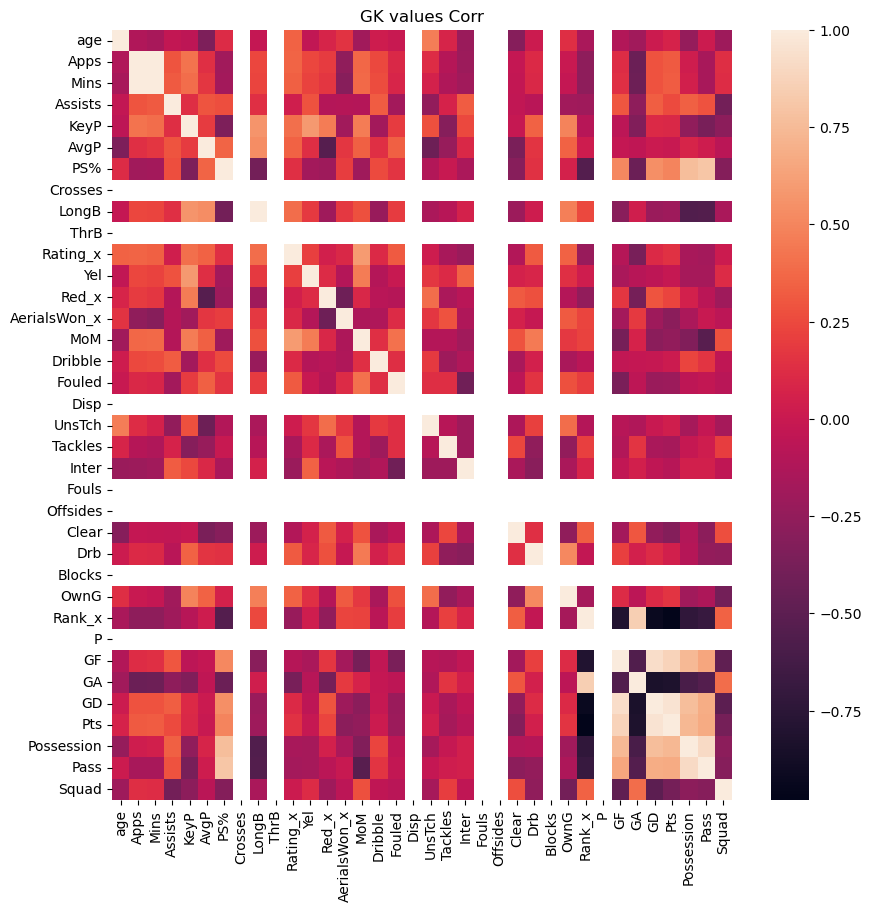

In [47]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(EPL_GK_corr_matrix)
plt.title('GK values Corr')
plt.show()

In [52]:
# 히트맵을 보고 nan이 나오는 변수는 제거
EPL_GK_df.drop(['Crosses', 'ThrB', 'Disp', 'Fouls', 'Offsides', 'Blocks', 'P'], axis=1, inplace=True)

In [53]:
# 변수 제거 후 다시 상관계수 확인
# 수치형 데이터만 뽑아온다.

EPL_GK_numeric_df = EPL_GK_df.select_dtypes(['int64', 'float64'])

In [54]:
EPL_GK_corr_matrix = EPL_GK_numeric_df.corr()
EPL_GK_corr_matrix

,age,Apps,Mins,Assists,KeyP,AvgP,PS%,LongB,Rating_x,Yel,...,Drb,OwnG,Rank_x,GF,GA,GD,Pts,Possession,Pass,Squad
age,1.000000,-1.173706e-01,-0.159524,-0.035702,-0.052689,-0.351490,0.111469,-0.025519,0.346556,-0.036379,...,0.013184,1.338808e-01,-0.149403,-0.110901,-0.187330,0.011682,0.068226,-0.241671,0.017924,-0.200734
Apps,-0.117371,1.000000e+00,0.996476,0.291449,0.417088,0.137891,-0.187998,0.237165,0.357919,0.241987,...,0.107625,6.956838e-17,-0.270625,0.126134,-0.432634,0.282549,0.317753,0.027106,-0.159826,0.129011
Mins,-0.159524,9.964755e-01,1.000000,0.313234,0.394701,0.169748,-0.176879,0.233956,0.337880,0.219376,...,0.099976,-2.458142e-02,-0.269230,0.139600,-0.422822,0.287056,0.321146,0.048223,-0.152730,0.124348
Assists,-0.035702,2.914494e-01,0.313234,1.000000,0.130437,0.293524,0.267826,0.137040,0.036185,0.286984,...,-0.076932,-1.875000e-01,-0.190816,0.302932,-0.273595,0.327886,0.256484,0.335819,0.284632,-0.395480
KeyP,-0.052689,4.170885e-01,0.394701,0.130437,1.000000,0.190644,-0.347025,0.562193,0.402463,0.587213,...,0.344051,4.844814e-01,-0.085924,-0.065948,-0.333247,0.108591,0.096252,-0.265233,-0.369101,-0.280761
AvgP,-0.351490,1.378907e-01,0.169748,0.293524,0.190644,1.000000,0.354595,0.533920,0.350000,0.126971,...,0.159945,3.437400e-01,0.020181,-0.025222,-0.044972,0.003742,-0.006132,0.078339,0.018481,-0.072749
PS%,0.111469,-1.879982e-01,-0.176879,0.267826,-0.347025,0.354595,1.000000,-0.391967,0.134877,-0.181796,...,0.145914,6.176972e-02,-0.543257,0.507122,-0.437475,0.539488,0.496921,0.761895,0.801655,-0.322000
LongB,-0.025519,2.371648e-01,0.233956,0.137040,0.562193,0.533920,-0.391967,1.000000,0.393888,0.183847,...,0.022457,4.694347e-01,0.243167,-0.292559,0.040860,-0.214320,-0.205233,-0.557403,-0.550459,-0.150802
Rating_x,0.346556,3.579192e-01,0.337880,0.036185,0.402463,0.350000,0.134877,0.393888,1.000000,0.209342,...,0.312201,3.435418e-01,-0.226012,-0.095338,-0.371553,0.106491,0.144538,-0.157028,-0.172072,0.012212
Yel,-0.036379,2.419867e-01,0.219376,0.286984,0.587213,0.126971,-0.181796,0.183847,0.209342,1.000000,...,0.087103,1.375949e-01,0.027316,-0.145096,-0.082605,-0.059162,-0.015892,-0.160858,-0.161243,0.117129


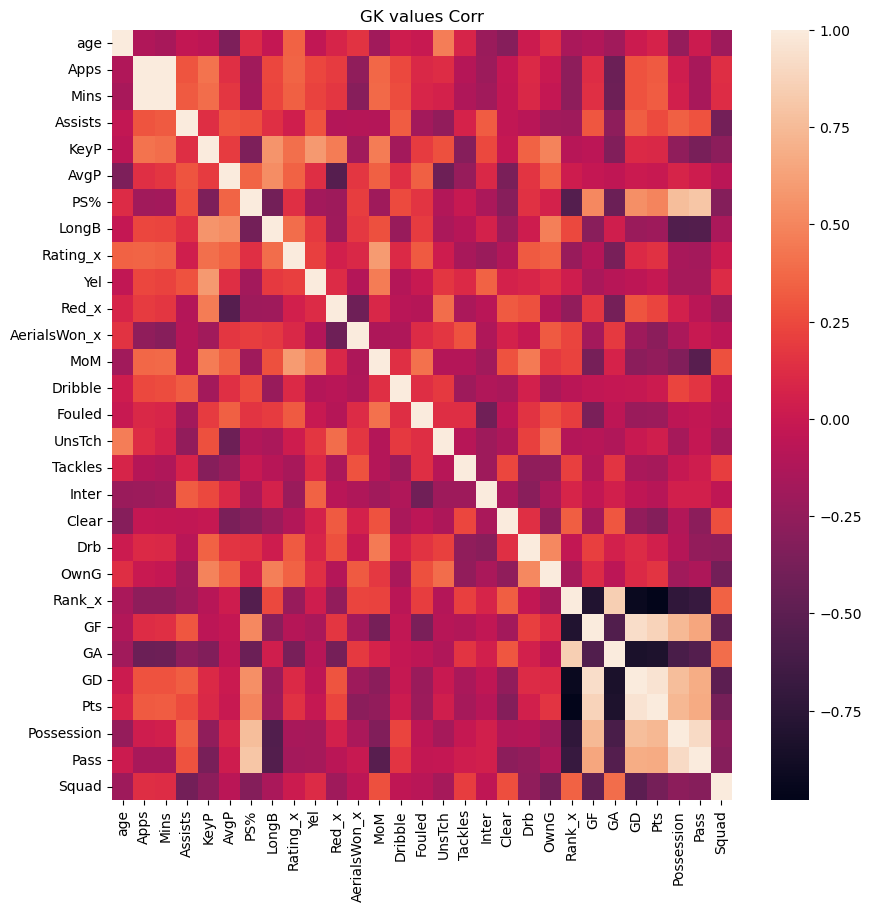

In [55]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(EPL_GK_corr_matrix)
plt.title('GK values Corr')
plt.show()

In [56]:
# Pts부분만 뽑아서 상관관계 확인

EPL_GK_corr_matrix_Pts = EPL_GK_corr_matrix[['Pts']]
EPL_GK_corr_matrix_Pts

,Pts
age,0.068226
Apps,0.317753
Mins,0.321146
Assists,0.256484
KeyP,0.096252
AvgP,-0.006132
PS%,0.496921
LongB,-0.205233
Rating_x,0.144538
Yel,-0.015892


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_98811/3885813374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


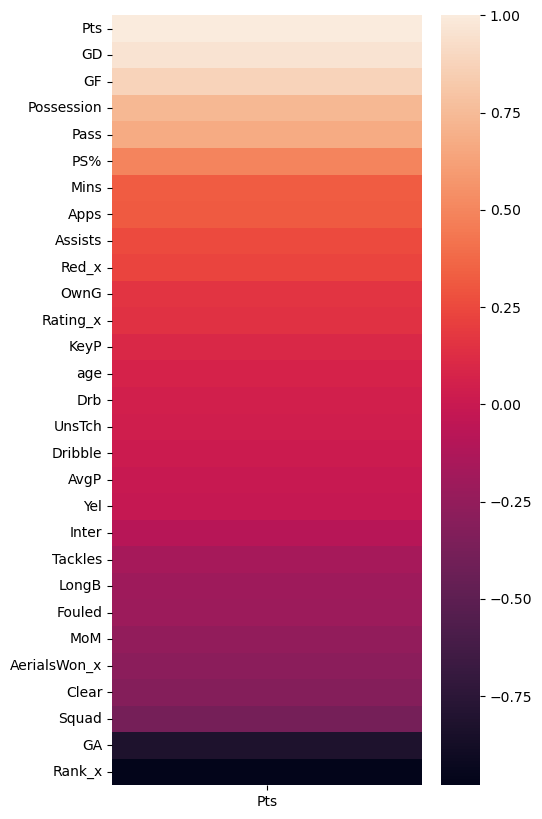

In [62]:
# 내림차순 정렬 후 heatmap으로 시각화

EPL_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(5, 10))
sns.heatmap(EPL_GK_corr_matrix_Pts)
plt.show()

In [66]:
# 상위 10개의 지표 선택
# Pts는 자기자신과 공분산이 1이므로 제외
# GD, GF 등 팀 지표가 들어가있다. -> 팀지표에서 Pts를 제외하곤 다 빼고 구해야됨

EPL_GK_corr_matrix_Pts[1:11].index.to_list()

['GD',
 'GF',
 'Possession',
 'Pass',
 'PS%',
 'Mins',
 'Apps',
 'Assists',
 'Red_x',
 'OwnG']

In [68]:
EPL_GK_df = pd.merge(EPL_GK_player_df, EPL_Team_df[['Team', 'Pts']], on='Team', how='inner')

In [69]:
EPL_GK_df

,player_name,team_number,Team,age,position,Apps,Mins,Assists,KeyP,AvgP,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
0,David Raya,189,Brentford,27,GK,38,3420,0,0.1,38.8,...,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,1,59
1,Bernd Leno,170,Fulham,31,GK,36,3240,0,0.0,33.5,...,0.0,0.0,0.0,0.0,0.0,0.7,0.1,0.0,0,52
2,Alisson,26,Liverpool,30,GK,37,3330,1,0.0,33.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0,67
3,Emiliano Martínez,24,Aston Villa,30,GK,36,3141,0,0.1,34.7,...,0.1,0.0,0.0,0.0,0.0,0.8,0.1,0.0,1,61
4,Kepa Arrizabalaga,15,Chelsea,28,GK,29,2566,0,0.0,30.9,...,0.0,0.1,0.0,0.0,0.0,1.1,0.0,0.0,0,44
5,Neto,183,Bournemouth,33,GK,27,2386,0,0.0,25.8,...,0.0,0.1,0.0,0.0,0.0,0.9,0.0,0.0,0,39
6,Vicente Guaita,162,Crystal Palace,36,GK,27,2430,0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,45
7,Nick Pope,23,Newcastle,31,GK,37,3262,0,0.1,17.8,...,0.1,0.0,0.0,0.0,0.0,1.2,0.1,0.0,0,71
8,Jordan Pickford,31,Everton,29,GK,37,3330,1,0.1,31.2,...,0.0,0.0,0.1,0.0,0.0,0.9,0.0,0.0,0,36
9,Lukasz Fabianski,29,West Ham,38,GK,36,3114,0,0.0,21.5,...,0.1,0.1,0.0,0.0,0.0,0.7,0.0,0.0,0,40


In [70]:
# 수치형 데이터만 뽑아온다.

EPL_GK_numeric_df = EPL_GK_df.select_dtypes(['int64', 'float64'])

In [71]:
EPL_GK_corr_matrix = EPL_GK_numeric_df.corr()
EPL_GK_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,Crosses,LongB,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Pts
team_number,1.000000,0.075181,-2.253154e-01,-0.199850,-0.029677,-0.089529,0.263787,0.148101,NaN,0.168557,...,-0.209260,0.021826,0.186945,NaN,NaN,-0.539980,-0.202907,NaN,6.639556e-03,0.097805
age,0.075181,1.000000,-1.173706e-01,-0.159524,-0.035702,-0.052689,-0.351490,0.111469,NaN,-0.025519,...,0.465628,0.072431,-0.216341,NaN,NaN,-0.311585,0.013184,NaN,1.338808e-01,0.068226
Apps,-0.225315,-0.117371,1.000000e+00,0.996476,0.291449,0.417088,0.137891,-0.187998,NaN,0.237165,...,0.120672,-0.096537,-0.207776,NaN,NaN,-0.024897,0.107625,NaN,2.329732e-16,0.317753
Mins,-0.199850,-0.159524,9.964755e-01,1.000000,0.313234,0.394701,0.169748,-0.176879,NaN,0.233956,...,0.060304,-0.123953,-0.190595,NaN,NaN,-0.028403,0.099976,NaN,-2.458142e-02,0.321146
Assists,-0.029677,-0.035702,2.914494e-01,0.313234,1.000000,0.130437,0.293524,0.267826,NaN,0.137040,...,-0.258775,0.069007,0.321798,NaN,NaN,-0.041526,-0.076932,NaN,-1.875000e-01,0.256484
KeyP,-0.089529,-0.052689,4.170885e-01,0.394701,0.130437,1.000000,0.190644,-0.347025,NaN,0.562193,...,0.277746,-0.308607,0.243544,NaN,NaN,-0.015918,0.344051,NaN,4.844814e-01,0.096252
AvgP,0.263787,-0.351490,1.378907e-01,0.169748,0.293524,0.190644,1.000000,0.354595,NaN,0.533920,...,-0.425743,-0.230058,0.100305,NaN,NaN,-0.365597,0.159945,NaN,3.437400e-01,-0.006132
PS%,0.148101,0.111469,-1.879982e-01,-0.176879,0.267826,-0.347025,0.354595,1.000000,NaN,-0.391967,...,-0.107637,-0.008720,-0.140904,NaN,NaN,-0.301515,0.145914,NaN,6.176972e-02,0.496921
Crosses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LongB,0.168557,-0.025519,2.371648e-01,0.233956,0.137040,0.562193,0.533920,-0.391967,NaN,1.000000,...,-0.140729,-0.088300,0.058400,NaN,NaN,-0.207147,0.022457,NaN,4.694347e-01,-0.205233


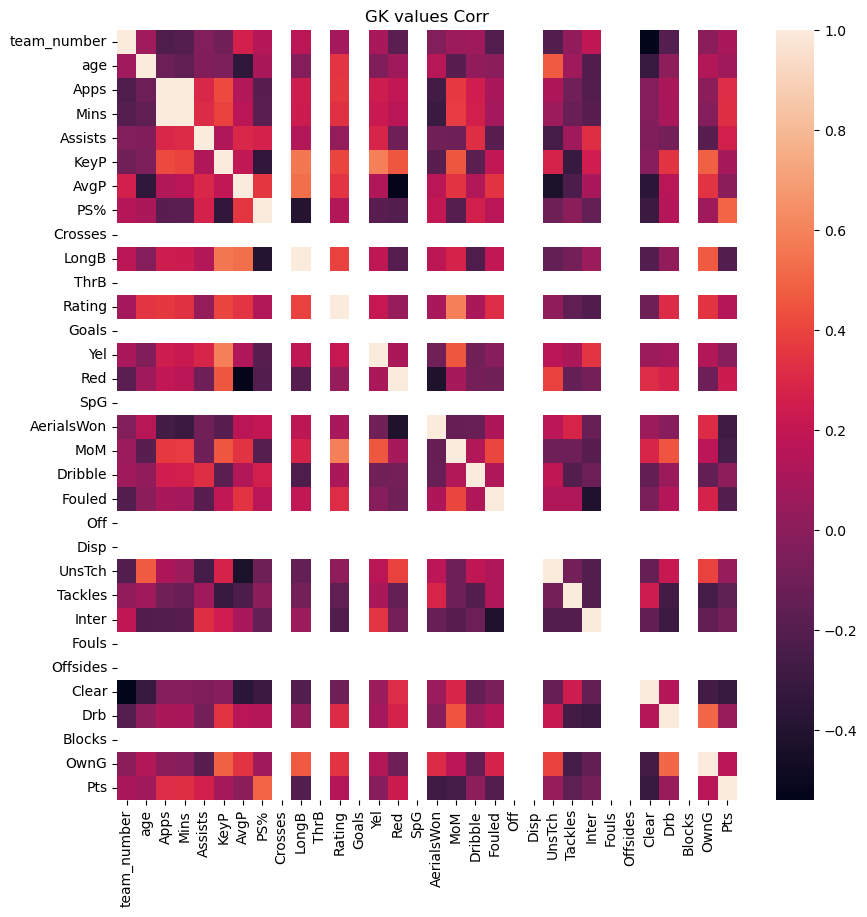

In [72]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(EPL_GK_corr_matrix)
plt.title('GK values Corr')
plt.show()

In [73]:
# 히트맵을 보고 nan이 나오는 변수는 제거
EPL_GK_df.drop(['Crosses', 'ThrB', 'Goals', 'SpG', 'Off', 'Disp', 'Fouls', 'Offsides', 'Blocks'], axis=1, inplace=True)

In [74]:
# 수치형 데이터만 뽑아온다.

EPL_GK_numeric_df = EPL_GK_df.select_dtypes(['int64', 'float64'])

In [75]:
EPL_GK_corr_matrix = EPL_GK_numeric_df.corr()
EPL_GK_corr_matrix

,team_number,age,Apps,Mins,Assists,KeyP,AvgP,PS%,LongB,Rating,...,MoM,Dribble,Fouled,UnsTch,Tackles,Inter,Clear,Drb,OwnG,Pts
team_number,1.000000,0.075181,-2.253154e-01,-0.199850,-0.029677,-0.089529,0.263787,0.148101,0.168557,0.088250,...,0.060020,0.062036,-0.210654,-0.209260,0.021826,0.186945,-0.539980,-0.202907,6.639556e-03,0.097805
age,0.075181,1.000000,-1.173706e-01,-0.159524,-0.035702,-0.052689,-0.351490,0.111469,-0.025519,0.346556,...,-0.184271,0.025452,-0.008188,0.465628,0.072431,-0.216341,-0.311585,0.013184,1.338808e-01,0.068226
Apps,-0.225315,-0.117371,1.000000e+00,0.996476,0.291449,0.417088,0.137891,-0.187998,0.237165,0.357919,...,0.367150,0.242405,0.100267,0.120672,-0.096537,-0.207776,-0.024897,0.107625,2.329732e-16,0.317753
Mins,-0.199850,-0.159524,9.964755e-01,1.000000,0.313234,0.394701,0.169748,-0.176879,0.233956,0.337880,...,0.374246,0.259664,0.086327,0.060304,-0.123953,-0.190595,-0.028403,0.099976,-2.458142e-02,0.321146
Assists,-0.029677,-0.035702,2.914494e-01,0.313234,1.000000,0.130437,0.293524,0.267826,0.137040,0.036185,...,-0.102062,0.321798,-0.179182,-0.258775,0.069007,0.321798,-0.041526,-0.076932,-1.875000e-01,0.256484
KeyP,-0.089529,-0.052689,4.170885e-01,0.394701,0.130437,1.000000,0.190644,-0.347025,0.562193,0.402463,...,0.456435,-0.177123,0.192318,0.277746,-0.308607,0.243544,-0.015918,0.344051,4.844814e-01,0.096252
AvgP,0.263787,-0.351490,1.378907e-01,0.169748,0.293524,0.190644,1.000000,0.354595,0.533920,0.350000,...,0.338710,0.138912,0.342040,-0.425743,-0.230058,0.100305,-0.365597,0.159945,3.437400e-01,-0.006132
PS%,0.148101,0.111469,-1.879982e-01,-0.176879,0.267826,-0.347025,0.354595,1.000000,-0.391967,0.134877,...,-0.192967,0.254729,0.160912,-0.107637,-0.008720,-0.140904,-0.301515,0.145914,6.176972e-02,0.496921
LongB,0.168557,-0.025519,2.371648e-01,0.233956,0.137040,0.562193,0.533920,-0.391967,1.000000,0.393888,...,0.274606,-0.223703,0.188440,-0.140729,-0.088300,0.058400,-0.207147,0.022457,4.694347e-01,-0.205233
Rating,0.088250,0.346556,3.579192e-01,0.337880,0.036185,0.402463,0.350000,0.134877,0.393888,1.000000,...,0.590794,0.108749,0.319026,0.018683,-0.155459,-0.218004,-0.109702,0.312201,3.435418e-01,0.144538


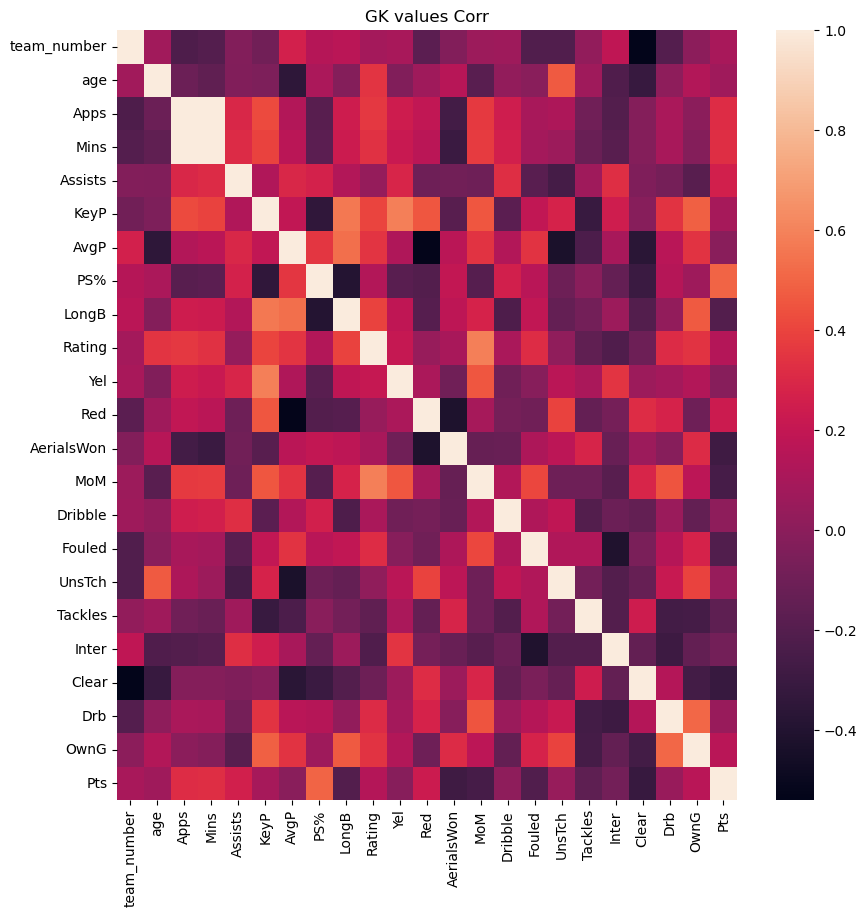

In [76]:
# heatmap으로 상관관계 시각화

plt.figure(figsize=(10, 10))
sns.heatmap(EPL_GK_corr_matrix)
plt.title('GK values Corr')
plt.show()

In [77]:
# Pts부분만 뽑아서 상관관계 확인

EPL_GK_corr_matrix_Pts = EPL_GK_corr_matrix[['Pts']]
EPL_GK_corr_matrix_Pts

,Pts
team_number,0.097805
age,0.068226
Apps,0.317753
Mins,0.321146
Assists,0.256484
KeyP,0.096252
AvgP,-0.006132
PS%,0.496921
LongB,-0.205233
Rating,0.144538


/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_98811/3885813374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPL_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)


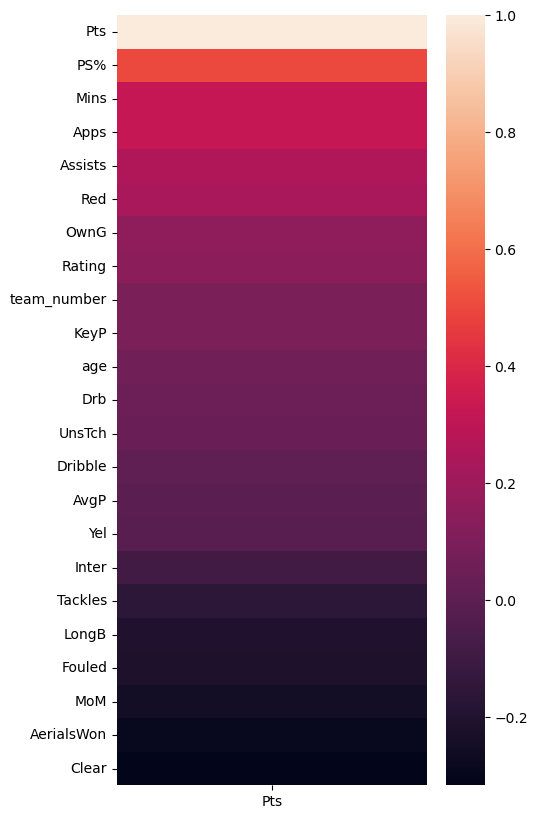

In [78]:
# 내림차순 정렬 후 heatmap으로 시각화

EPL_GK_corr_matrix_Pts.sort_values('Pts', ascending=False, inplace=True)
plt.figure(figsize=(5, 10))
sns.heatmap(EPL_GK_corr_matrix_Pts)
plt.show()

In [79]:
# 상위 5개의 지표 선택
# Pts는 자기자신과 공분산이 1이므로 제외

# 결과를 분석해보자
# PS%: 골키퍼의 패스 성공률이 높을수록 승리에 가까워질 것 같다. -> 인정
# Mins: 플레이 타임... -> 어느정도 인정
# Apps: 경기 출전수... -> 어느정도 인정
# Assists: 골키퍼한테 어시스트..? -> 노인정
# Red: 골키퍼한테 레드카드 -> 어느정도 인정 -> Red카드에 의해 경기 결과가 바뀌는 경우의 수가 많았을까? -> 적절하지는 않다고 본다.

# 종합: 골키퍼의 경우 평가 지표가 적절하지 않아 평가하기에 적합하지는 않은 것 같다.

EPL_GK_corr_matrix_Pts[1:6].index.to_list()

['PS%', 'Mins', 'Apps', 'Assists', 'Red']